In [1]:
import partridge as ptg
import datetime
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox
import networkx as nx
import pandas as pd
%matplotlib inline

In [2]:
path=r"N:\Planning - New File Structure\GIS\Data\GTFS\VRT5_10_18.zip"

In [3]:
service_ids_by_date=ptg.read_service_ids_by_date(path)

In [4]:
date=datetime.date(2018, 6, 4)

In [ ]:
service_ids=service_ids_by_date[date]

In [ ]:
feed=ptg.feed(path,view={
    'trips.txt':{
        'service_id':service_ids,
    },
})

In [ ]:
#assert service_ids==set(feed.trips.service_id)

In [ ]:
df=feed.stops

In [ ]:
df['Coordinates']=list(zip(df.stop_lat,df.stop_lon))

In [ ]:
df.set_index('stop_name')

,stop_id,stop_code,stop_desc,stop_lat,stop_lon,zone_id,Coordinates
stop_name,,,,,,,
University & Chrisway,01010155,NaN,NaN,43.603910,-116.207217,zoneforstop_VRT_42,"(43.603909508306046, -116.20721675602077)"
Lincoln & University,01010158,NaN,NaN,43.601055,-116.202444,zoneforstop_VRT_44,"(43.60105498248787, -116.20244428219452)"
Beacon & Lincoln,01010640,NaN,NaN,43.598315,-116.201776,zoneforstop_VRT_46,"(43.598315481598576, -116.20177589748256)"
Beacon & Manitou,01010638,NaN,NaN,43.598329,-116.198737,zoneforstop_VRT_47,"(43.59832888786902, -116.1987372011365)"
Beacon & Grant,01010498,NaN,NaN,43.598322,-116.196294,zoneforstop_VRT_49,"(43.59832154327328, -116.19629360681816)"
Beacon & Broadway,01010635,NaN,NaN,43.598300,-116.193760,zoneforstop_VRT_51,"(43.598299999910004, -116.19376026058443)"
Beacon & Colorado,01010633,NaN,NaN,43.598340,-116.189893,zoneforstop_VRT_52,"(43.59833999991, -116.18989251518495)"
Beacon & Parkcenter,01010427,NaN,NaN,43.598578,-116.187215,zoneforstop_VRT_53,"(43.598578041622645, -116.18721526481787)"
Parkcenter & Mallard,01010429,NaN,NaN,43.596623,-116.178125,zoneforstop_VRT_55,"(43.596622643821696, -116.17812494029491)"


In [ ]:
outfolder=r"N:\Planning - New File Structure\GIS\Data\Stops\Walksheds"

In [ ]:
#for index, row in df.iterrows():
    #try:
        #stopname=row['stop_name']+"_"+row['stop_id']
        #ox.save_graph_shapefile((ox.graph_from_point(row['Coordinates'],distance=401,network_type='walk')),folder=outfolder,filename=stopname)
        #print(stopname)
    #except Exception:
        #print(stopname+"ERROR")
        #continue
    

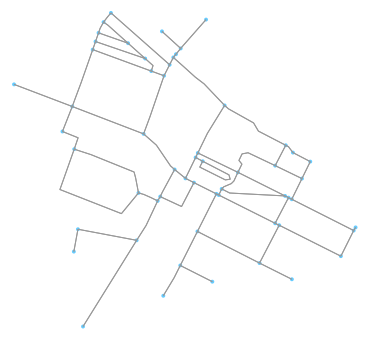

(<Figure size 649.733x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c17cead9b0>)

In [ ]:
UandChris=ox.graph_from_point((43.603909508306046, -116.20721675602077),distance=400,distance_type='network',network_type='walk')
ox.save_graphml(UandChris,filename=r"N:\Planning - New File Structure\GIS\Data\Walksheds\UandChris.graphml")
UandChris2=ox.load_graphml(r"N:\Planning - New File Structure\GIS\Data\Walksheds\UandChris.graphml")
ox.plot_graph(UandChris)

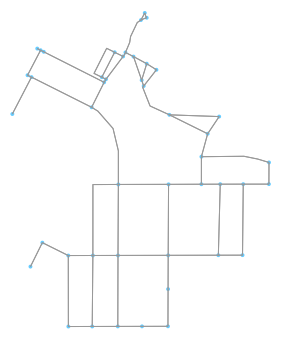

(<Figure size 488.237x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c17d44d0f0>)

In [ ]:
LincandU=ox.graph_from_point((43.60105498248787, -116.20244428219452),distance=400,distance_type='network',network_type='walk')
ox.save_graphml(LincandU,filename=r"N:\Planning - New File Structure\GIS\Data\Walksheds\LincandU.graphml")
LincandU2=ox.load_graphml(r"N:\Planning - New File Structure\GIS\Data\Walksheds\LincandU.graphml")
ox.plot_graph(LincandU)

In [ ]:
twostops=nx.compose(UandChris2,LincandU2)

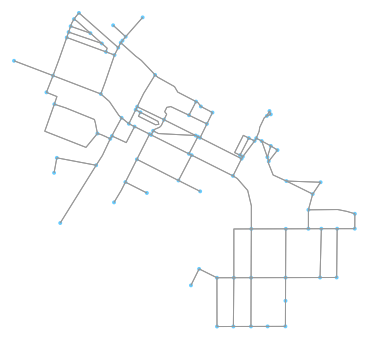

(<Figure size 648.355x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c17d3f9518>)

In [ ]:
ox.plot_graph(twostops)

In [ ]:
a={}
for index, row in df.iterrows():
    a["{0}".format(row['stop_id'])]=ox.graph_from_point(row['Coordinates'],distance=400,distance_type='network',network_type='walk')
    print(len(a))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
a=pd.DataFrame(a)
a.head()

In [ ]:
b={}
for index, row in enumerate(a):
    b["{0}".format(row['stop_id'])]=ox.save_graphml(str(row[0]),filename=outfolder+"\\"+index+".graphml")
    print(len(b))